In [3]:
import os

import numpy as np
import torch

import matplotlib.pyplot as plt


from LFIS.config.config import get_configuration, get_baseconfig
from LFIS.LF.LF import LF_base

from LFIS.util.util import (
                    run_stat,
                    save_file,
                    load_file)

In [4]:
def check_parameter(config):
    print(f'Case: {config.case}')
    print(f'Problem: {config.problemtype}')
    print(f'Number of steps: {config.nstep}')
    print(f'Device: {config.device}')
    print(f'Number of dimension: {config.ndim}')
    print(f'Epoch: {config.train.epoch}')
    print(f'Sample size: {config.train.nsample}')
    print(f'Batch size: {config.train.nbatch}')

In [5]:
cfg = get_baseconfig()
configurer = get_configuration()

In [6]:
case = 'MG2D'

In [7]:
cfg_MG2D = configurer.setup_config(cfg, case)

In [8]:
check_parameter(cfg_MG2D)

Case: Mode-separated Gaussian Mixture
Problem: transform
Number of steps: 256
Device: cuda:0
Number of dimension: 2
Epoch: 2000
Sample size: 600000
Batch size: 20000


In [9]:
trainer = cfg_MG2D.train.method

In [10]:
LFmodel = LF_base(cfg_MG2D)
LFmodel.to(cfg_MG2D.device)

LF_base(
  (flow): NN_Base(
    (layers): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (2): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (3): SiLU()
      (4): Linear(in_features=64, out_features=2, bias=True)
    )
  )
)

# Train LFIS

In [11]:
output = trainer(cfg_MG2D)
save_file(case, output)

tensor(0.) tensor(0., device='cuda:0')
time = 0.0000, loss = 0.0000, percetage = nan%
Complete Training Flow at time 0.0000
tensor(0.0039) tensor(0.2729, device='cuda:0')
time = 0.0039, loss = 0.2768, percetage = 99.9954%
time = 0.0039, loss = 0.0076, percetage = 2.6714%
time = 0.0039, loss = 0.0059, percetage = 2.0541%
time = 0.0039, loss = 0.0056, percetage = 1.9798%
time = 0.0039, loss = 0.0054, percetage = 1.8185%
time = 0.0039, loss = 0.0045, percetage = 1.6979%
time = 0.0039, loss = 0.0009, percetage = 0.3179%
time = 0.0039, loss = 0.0005, percetage = 0.1665%
time = 0.0039, loss = 0.0004, percetage = 0.1454%
time = 0.0039, loss = 0.0004, percetage = 0.1280%
Complete Training Flow at time 0.0039
tensor(0.0078) tensor(0.5435, device='cuda:0')
time = 0.0078, loss = 0.2729, percetage = 24.7312%
time = 0.0078, loss = 0.0014, percetage = 0.1235%
time = 0.0078, loss = 0.0012, percetage = 0.1007%
time = 0.0078, loss = 0.0010, percetage = 0.0925%
time = 0.0078, loss = 0.0009, percetage = 

# Load pre-trained LFIS

In [12]:
nnmodel = cfg_MG2D.nnmodel.to(cfg_MG2D.device)
output = load_file(case, nnmodel)

In [13]:
logstat = run_stat(LFmodel, output)

In [14]:
logstat

{'logzmean': -0.0004383034737927327,
 'logzstd': 0.003492024234215358,
 'samples': array([[-0.22097284, -0.0343663 ],
        [-0.07262498,  0.88158922],
        [-0.02912513,  0.9077669 ],
        ...,
        [-0.10787523, -1.1086906 ],
        [-1.0847165 ,  0.19499853],
        [ 1.19837298,  0.16073245]]),
 'weight': array([0.79996283, 1.03313331, 1.02148041, ..., 1.03008849, 1.03711798,
        1.02534327]),
 'logzlist': array([-0.0067741 ,  0.00174486,  0.00501025, -0.00659185, -0.000421  ,
         0.00230848,  0.00062939, -0.00625226, -0.00644464, -0.00254188,
         0.00295996, -0.0022016 , -0.00018055,  0.00143146, -0.00411639,
         0.0024065 ,  0.00304296, -0.00061205, -0.000965  ,  0.00365626,
        -0.00187123,  0.00254866, -0.00260437,  0.00313167, -0.00565844,
        -0.00033029, -0.00254748,  0.00547046,  0.00100794,  0.00161518])}

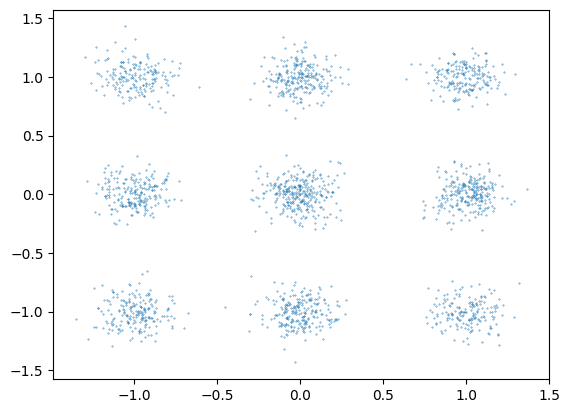

In [15]:
samples = logstat['samples']
plt.scatter(samples[:,0],samples[:,1], s = 0.1)